#Part One

In [ ]:
# pip install tensorflow

In [ ]:
from sklearn.datasets import make_circles
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
x, y = make_circles(1000, noise=0.02, factor=0.5, random_state=42)

In [ ]:
loss = []
accuracy = []

In [ ]:
circle = pd.DataFrame({ 'X0' : x[:, 0], 'X1' : x[:, 1], 'label' : y})
circle.head()

,X0,X1,label
0,0.470651,0.145626,1
1,-0.471216,0.096751,1
2,-0.510524,0.111344,1
3,-0.248295,0.431761,1
4,0.440510,-0.897617,0


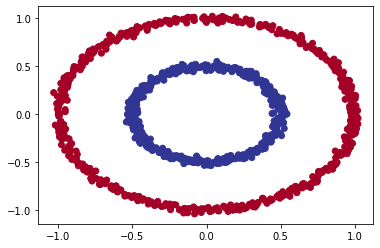

In [ ]:
plt.scatter(x[:,0], x[:,1], c = y, cmap = plt.cm.RdYlBu)

In [ ]:
tf.random.set_seed(42)

##neural network without activation function

In [ ]:
model_1 = tf.keras.Sequential([

  tf.keras.layers.Dense(4),

  tf.keras.layers.Dense(6),

  tf.keras.layers.Dense(1)

])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),

                metrics=['accuracy'])

model_1.fit(x, y, epochs=100, verbose=0)

In [ ]:
results = model_1.evaluate(x, y)
loss.append(results[0])
accuracy.append(results[1])

32/32 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.3400


در مدل بالا مشاهده می‌شود که مقدار صحت کم است و مدل به خوبی دسته بندی را انجام نمی دهد

##neural network with linear activation function

In [ ]:
model_2 = tf.keras.Sequential([

  tf.keras.layers.Dense(4, activation='linear'),

  tf.keras.layers.Dense(6, activation='linear'),

  tf.keras.layers.Dense(1, activation='linear')

])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),

                metrics=['accuracy'])

model_2.fit(x, y, epochs=100, verbose=0)

In [ ]:
results = model_2.evaluate(x, y)
loss.append(results[0])
accuracy.append(results[1])

32/32 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.5000


با وجود افزایش صحت، همچنان مدل صحت پایینی دارد و نمی‌تواند به خوبی دسته بندی کند

##neural network with linear activation function and regression loss (MAE)

In [ ]:
model_3 = tf.keras.Sequential([

  tf.keras.layers.Dense(4, activation='linear'),

  tf.keras.layers.Dense(6, activation='linear'),

  tf.keras.layers.Dense(1, activation='linear')

])

model_3.compile(loss=tf.keras.losses.MeanAbsoluteError(),

                metrics=['accuracy'])

model_3.fit(x, y, epochs=100, verbose=0)

In [ ]:
results = model_3.evaluate(x, y)
loss.append(results[0])
accuracy.append(results[1])

32/32 [==============================] - 0s 1ms/step - loss: 0.5000 - accuracy: 0.3900


این بار صحت مدل نسبت به هر دو مدل قبلی کاهش چشم گیری پیدا کرد و همچنان مدل نمی‌تواند به خوبی دسته بندی کند

##one layered neural network linear activation function and regression loss (MAE)

In [ ]:
model_4 = tf.keras.Sequential([tf.keras.layers.Dense(4, activation='linear')])
model_4.compile(loss=tf.keras.losses.MeanAbsoluteError(),

                metrics=['accuracy'])

model_4.fit(x, y, epochs=100, verbose=0)

In [ ]:
results = model_4.evaluate(x, y)
loss.append(results[0])
accuracy.append(results[1])

32/32 [==============================] - 0s 1ms/step - loss: 0.5000 - accuracy: 0.1520


همچنان مدل نمی‌تواند درست دسته بندی کند

##Optimizing learning rate

In [ ]:
model_5 = tf.keras.Sequential([tf.keras.layers.Dense(4, activation='linear')])
model_5.compile(loss=tf.keras.losses.MeanAbsoluteError(),
                optimizer = tf.keras.optimizers.Adam(learning_rate= 0.19),
                metrics=['accuracy'])

model_5.fit(x, y, epochs=100, verbose=0)

In [ ]:
results = model_5.evaluate(x, y)
loss.append(results[0])
accuracy.append(results[1])

32/32 [==============================] - 0s 1ms/step - loss: 0.4999 - accuracy: 0.3650


##Optimal neural network


In [ ]:
x_train, y_train = x[:800], y[:800]
x_test, y_test = x[800:], y[800:]
x_train.shape, x_test.shape

((800, 2), (200, 2))

In [ ]:
model_6 = tf.keras.Sequential([

                               tf.keras.layers.Dense(4, activation = 'relu'),

                               tf.keras.layers.Dense(4, activation = 'relu'),

                               tf.keras.layers.Dense(1, activation = 'sigmoid')

])

model_6.compile( loss= tf.keras.losses.MeanAbsoluteError(),

                optimizer = tf.keras.optimizers.Adam(learning_rate= 0.01),

                metrics = ['accuracy'])

model_6.fit(x_train, y_train, epochs = 25, verbose = 0)

In [ ]:
results = model_6.evaluate(x, y)
loss.append(results[0])
accuracy.append(results[1])

32/32 [==============================] - 0s 1ms/step - loss: 8.1766e-04 - accuracy: 1.0000


##Loss and accuracy plot

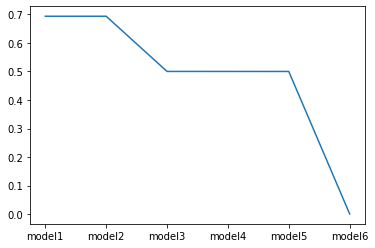

In [ ]:
plt.plot(['model1', 'model2', 'model3', 'model4', 'model5', 'model6'], loss)

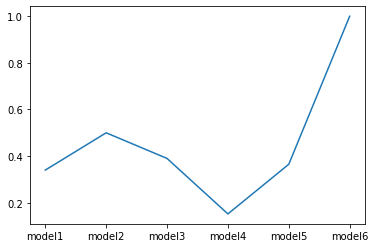

In [ ]:
plt.plot(['model1', 'model2', 'model3', 'model4', 'model5', 'model6'], accuracy)

#Part Two

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
model_f = tf.keras.Sequential([

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)),
	  tf.keras.layers.MaxPooling2D((2, 2)),
	  tf.keras.layers.Flatten(),
	  tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_uniform'),
	  tf.keras.layers.Dense(10, activation='softmax')
])

model_f.compile( loss= tf.keras.losses.SparseCategoricalCrossentropy(),

                optimizer = tf.keras.optimizers.Adam(learning_rate= 0.01),

                metrics = ['accuracy'])

model_f.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 39s 20ms/step - loss: 0.4527 - accuracy: 0.8537 - val_loss: 0.3572 - val_accuracy: 0.8709
Epoch 2/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.3016 - accuracy: 0.8891 - val_loss: 0.3853 - val_accuracy: 0.8725
Epoch 3/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2759 - accuracy: 0.8981 - val_loss: 0.3320 - val_accuracy: 0.8760
Epoch 4/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2520 - accuracy: 0.9074 - val_loss: 0.3569 - val_accuracy: 0.8827
Epoch 5/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2394 - accuracy: 0.9110 - val_loss: 0.3796 - val_accuracy: 0.8752
Epoch 6/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2235 - accuracy: 0.9180 - val_loss: 0.3957 - val_accuracy: 0.8768
Epoch 7/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.2129 - accuracy: 0.9212 - val_loss: 0.4331 -

In [ ]:
test_loss, test_accuracy = model_f.evaluate(test_images, test_labels)

313/313 [==============================] - 4s 13ms/step - loss: 0.4602 - accuracy: 0.8866


In [ ]:
y_test = test_labels / 255.0
y_pred = model_f.predict(test_images)

array([[0.03529412],
       [0.00784314],
       [0.00392157],
       ...,
       [0.03137255],
       [0.00392157],
       [0.01960784]])

In [ ]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)